<a href="https://colab.research.google.com/github/TanoOliva/ADA-Informes/blob/main/Qsort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de ordenamiento

**Entrada**: Secuencia de n números $[a_1,a_2,...,a_n]$

**Salida**: Permutación ordenada de la secuencia de entrada: $[a_1',a_2',...,a_n']$, de tal manera que $a_1'\leq a_2' \leq... \leq a_n'$.

![image](https://i.imgur.com/MvYh5qf.png)

Desde los comienzos de la computación, el problema del ordenamiento ha atraído gran cantidad de investigación, tal vez debido a la complejidad de resolverlo eficientemente a pesar de su planteamiento simple y familiar. Por ejemplo, BubbleSort fue analizado desde 1956.​ Aunque muchos puedan considerarlo un problema resuelto, nuevos y útiles algoritmos de ordenamiento se siguen inventado hasta el día de hoy (por ejemplo, el ordenamiento de biblioteca se publicó por primera vez en el 2004).



# 2. Quick Sort

El siguiente codigo muestra una implementacion del algoritmo QuickSort

## 2.1 Código

In [2]:
#Qsort

# This implementation utilizes pivot as the last element in the nums list
# It has a pointer to keep track of the elements smaller than the pivot
# At the very end of partition() function, the pointer is swapped with the pivot
# to come up with a "sorted" nums relative to the pivot


def partition(l, r, nums, verbose = False):
	if verbose == True: 
		print("array de entrada: ",nums)
	# Last element will be the pivot and the first element the pointer
	pivot, ptr = nums[r], l
	if verbose == True:
		print("pivote = ",pivot)
	for i in range(l, r):
		if nums[i] <= pivot:
			# Swapping values smaller than the pivot to the front
			nums[i], nums[ptr] = nums[ptr], nums[i]
			ptr += 1
	# Finally swapping the last element with the pointer indexed number
	nums[ptr], nums[r] = nums[r], nums[ptr]
	if verbose == True: 
		print("array de salida: ",nums)
	return ptr

# With quicksort() function, we will be utilizing the above code to obtain the pointer
# at which the left values are all smaller than the number at pointer index and vice versa
# for the right values.


def quicksort(l, r, nums, verbose = False):
	if len(nums) == 1: # Terminating Condition for recursion. VERY IMPORTANT!
		return nums
	if l < r:
		pi = partition(l, r, nums,verbose)
		quicksort(l, pi-1, nums,verbose) # Recursively sorting the left values
		quicksort(pi+1, r, nums,verbose) # Recursively sorting the right values
	return nums


example = [4, 5, 1, 2, 3]
result = [1, 2, 3, 4, 5]
print(quicksort(0, len(example)-1, example))
example = [2, 5, 6, 1, 4, 6, 2, 4, 7, 8]
result = [1, 2, 2, 4, 4, 5, 6, 6, 7, 8]
# As you can see, it works for duplicates too
print(quicksort(0, len(example)-1, example))


[1, 2, 3, 4, 5]
[1, 2, 2, 4, 4, 5, 6, 6, 7, 8]


## 2.2 Descripcion del algoritmo

El algoritmo recibe como entrada una lista (o arreglo) a con la secuencia de n elementos que queremos ordenar. Luego, los números se ordenan y retorna la misma lista de entrada.


1. Se hace uso de la función Partition que organiza los elementos a la izquierda y derecha de un pivote.

2. Se divide el arreglo original en dos sub-arreglos de igual o distinto tamaño.

3. Se aplica Quick Sort recursivamente en cada una de las mitades.




## 2.3  Ejemplo (verbose == True)





In [3]:
Array = [9,-3,5,2,6,8,-6,1,3]

Array = quicksort(0,len(Array)-1,Array,True)

array de entrada:  [9, -3, 5, 2, 6, 8, -6, 1, 3]
pivote =  3
array de salida:  [-3, 2, -6, 1, 3, 8, 5, 9, 6]
array de entrada:  [-3, 2, -6, 1, 3, 8, 5, 9, 6]
pivote =  1
array de salida:  [-3, -6, 1, 2, 3, 8, 5, 9, 6]
array de entrada:  [-3, -6, 1, 2, 3, 8, 5, 9, 6]
pivote =  -6
array de salida:  [-6, -3, 1, 2, 3, 8, 5, 9, 6]
array de entrada:  [-6, -3, 1, 2, 3, 8, 5, 9, 6]
pivote =  6
array de salida:  [-6, -3, 1, 2, 3, 5, 6, 9, 8]
array de entrada:  [-6, -3, 1, 2, 3, 5, 6, 9, 8]
pivote =  8
array de salida:  [-6, -3, 1, 2, 3, 5, 6, 8, 9]


#3. Tiempo de Ejecucion

El análisis general de la eficiencia de quicksort es difícil. La mejor forma de ilustrar y calcular la complejidad del algoritmo es considerar el número de comparaciones realizadas teniendo en cuenta circunstancias ideales. Supongamos que n (número de elementos de la lista) es una potencia de 2, n = 2k (k = log2n).
Además, supongamos que el pivote es el elemento central de cada lista, de modo que quicksort divide la sublista en dos sublistas aproximadamente iguales.



# 4. Correctitud

Para probar la correctitud de algoritmos recursivos usaremos inducción matemática.

En inducción matemática, para probar una declaración P(n), para todos los números naturales n, típicamente debemos:

1. Probar P(n) para un caso base, por ejemplo P(1).

2. Se asume que si P(m) es cierto para m < n, entonces P(n) también lo es. 

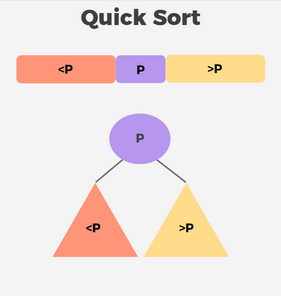

## Teroema 

El algoritmo Partition recibe un arreglo A[p..r], lo reorganiza y retorna un índice "q" de tal forma que los elementos del arreglo A[p..q-1] son menores o iguales a A[q] y los elementos del arreglo A[q+1..r] son mayores a A[q].

Propiedad invariante de bucle:

Al comienzo de cada iteración, se cumple que para cualquier índice k:

Si p ≤ k ≤ i, entonces A[ k ] ≤ A[ r ]

Si i < k < j, entonces A[ k ] > A[ r ]

*Siendo "p" el primer elemento del arreglo "i" el puntero y "j" indice que recorre.

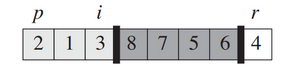


INICIALIZACIÓN

Primera iteración: Al comienzo de la primera iteración, i = p − 1 y j = p. Como no existe k tal que  p ≤ k ≤ i o i < k < j, los invariantes 1 y 2 son ciertos. 

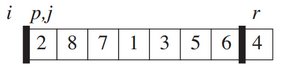

Mantenimiento

I-ésima iteración: Luego de una iésima iteración existen dos posibles

Arr[j] > r: 

La iteracion no cambia el arreglo y j se incrementa


Arr[j] <= r: 

A[i+1] se intercambia con A[j] e i se incrementa.

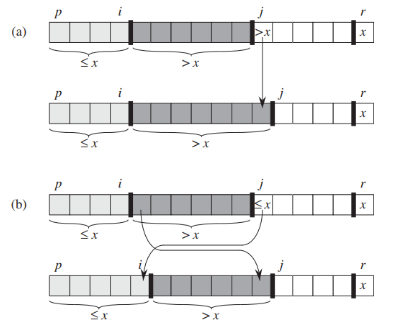





# 5. Experimentos

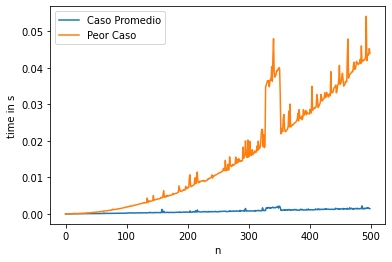

In [15]:
import matplotlib.pyplot as plt
import time
import numpy as np
import random


def randomArray(n):
  array = np.zeros(n)
  for i in range (len(array)):
    array[i] = int(random.randint(1,500))
  return array




z = np.zeros(500)
y = np.zeros(500)
ww = np.zeros(500)

x = [n for n in range(0,500)]
for i in range (0,500):
  array = randomArray(i)
  array1 = array
  start = time.time()
  array = quicksort(0, len(array)-1, array)
  end = time.time()
  y[i] = end - start

  start = time.time()
  array = quicksort(0, len(array)-1, array)
  end = time.time()
  z[i] = end - start





plt.plot(x,y,z)
plt.legend(["Caso Promedio","Peor Caso"])

plt.xlabel('n')
plt.ylabel('time in s')
plt.show()
  





Analisis: El mejor caso se hace cuando el pivote queda en la ultima posicion y los elementos estan perfectamente ordenados de manera descendente, en cambio cuando los elementos estan ordenados de menor a mayor tiene una complejidad de O(n^2)

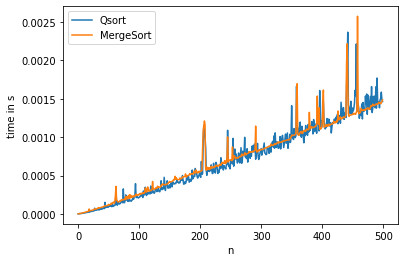

In [20]:
def merge(left, right,verbose):
  global contComp
  if verbose == True:
    print("\nMERGE")
  ordenado = []
  i, j = 0, 0

  while i < len(left) and j < len(right):
    if left[i] <= right[j]:
      ordenado.append(left[i])
      i = i + 1
    else: 
      ordenado.append(right[j])
      j = j + 1

  while i < len(left): 
    
    ordenado.append(left[i])
    i = i + 1

  while j < len(right):
    ordenado.append(right[j])
    j = j + 1

  return ordenado

def mergeSort(arr, verbose = False):
  global contRec
  if verbose == True:
    print("Entrada de mergeSort: ",arr)


  if len(arr) < 2:
    return arr[:]
  else:
    middle = len(arr) // 2
    left = mergeSort(arr[:middle],verbose)
    right = mergeSort(arr[middle:],verbose)
    together = merge(left, right,verbose)
    if verbose == True:
      print('Subdivision ordenada: ', together,'\n')
    return together



z = np.zeros(500)
y = np.zeros(500)
x = [n for n in range(0,500)]


for i in range (0,500):
  array = randomArray(i)
  array1 = array
  start = time.time()
  array = quicksort(0, len(array)-1, array)
  end = time.time()
  y[i] = end - start

  start = time.time()
  array = mergeSort(array1)
  end = time.time()
  z[i] = end - start


plt.plot(x,y)


plt.plot(x,z)
plt.legend(["Qsort","MergeSort"])

plt.xlabel('n')
plt.ylabel('time in s')
plt.show()

La complejidad de ambos algoritmos es de O(nlogn) por lo que sus curvas son muy parecidas